In [2]:
# link to data: https://archive.ics.uci.edu/dataset/523/exasens

In [3]:
# 4 groups of respiratory diseases: 
#Chronic Obstructive Pulmonary Disease (COPD), asthma, infected, and Healthy Controls (HC).

In [4]:
'''
6- Saliva Permittivity:

a) Imaginary part (Min(Î”)=Absolute minimum value, Avg.(Î”)=Average)  

b) Real part (Min(Î”)=Absolute minimum value, Avg.(Î”)=Average)

haven't used this -- many data are missing and couldn't understand importance 
'''

"\n6- Saliva Permittivity:\n\na) Imaginary part (Min(Î”)=Absolute minimum value, Avg.(Î”)=Average)  \n\nb) Real part (Min(Î”)=Absolute minimum value, Avg.(Î”)=Average)\n\nhaven't used this -- many data are missing and couldn't understand importance \n"

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import ast
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as sch

In [6]:
data = pd.read_csv('Exasens.csv')

In [7]:
bins = [10, 30, 50, 70, 100]

# Use pd.cut to categorize and then convert categories to codes
data['Age_group'] = pd.cut(data['Age'], bins=bins, labels=False, right=True, include_lowest=True)

In [8]:
data

,Diagnosis,ID,Imaginary Part,Unnamed: 3,Real Part,Unnamed: 5,Gender,Age,Smoking,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Age_group
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Min,Avg.,Min,Avg.,NaN,NaN,NaN,NaN,NaN,Gender,Somking,NaN
2,COPD,301-4,-320.61,-300.5635307,-495.26,-464.1719907,1.0,77.0,2.0,NaN,NaN,Male=1,Non-smoker=1,3.0
3,COPD,302-3,-325.39,-314.7503595,-473.73,-469.2631404,0.0,72.0,2.0,NaN,NaN,Female=0,Ex-smoker=2,3.0
4,COPD,303-3,-323,-317.4360556,-476.12,-471.8976667,1.0,73.0,3.0,NaN,NaN,NaN,Active-smoker=3,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,Infected,I176,NaN,NaN,NaN,NaN,0.0,49.0,2.0,NaN,NaN,NaN,NaN,1.0
397,Infected,I177,NaN,NaN,NaN,NaN,0.0,37.0,1.0,NaN,NaN,NaN,NaN,1.0
398,Infected,I178,NaN,NaN,NaN,NaN,0.0,29.0,1.0,NaN,NaN,NaN,NaN,0.0
399,Infected,I179,NaN,NaN,NaN,NaN,1.0,51.0,1.0,NaN,NaN,NaN,NaN,2.0


In [9]:
#Encode Disease Names to Numbers
label_encoder = LabelEncoder()
data['Disease_label_number'] = label_encoder.fit_transform(data.iloc[:, 0])

In [10]:
X= data[['Gender', 'Smoking','Age_group']].iloc[2:]
y= data['Disease_label_number'].iloc[2:]

In [11]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
y_pred_rf = rf.predict(X_test)

In [14]:
accuracy1 = accuracy_score(y_test, y_pred_rf)
accuracy1

0.4666666666666667

In [15]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [16]:
y_pred_svc= svc.predict(X_test)

In [17]:
accuracy3 = accuracy_score(y_test, y_pred_svc)
accuracy3

0.48333333333333334

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred_knn = knn.predict(X_test)

In [20]:
accuracy4 = accuracy_score(y_test, y_pred_knn)
accuracy4

0.45

In [21]:
#############################################################################

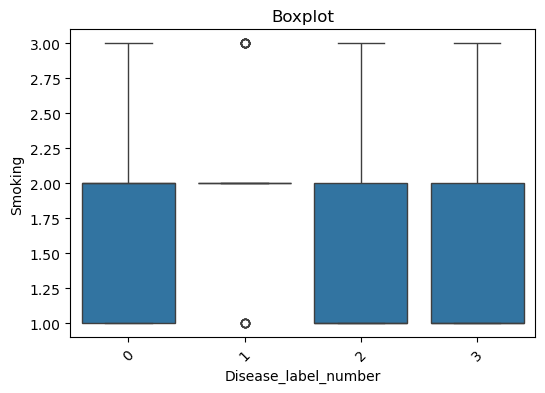

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data["Disease_label_number"].iloc[2:], y=data["Smoking"].iloc[2:])

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xlabel("Disease_label_number")
plt.ylabel("Smoking")
plt.title("Boxplot")
plt.show()

In [23]:
#  1 = Non-smoker 2 = Ex-smoker 3 = Active-smoker
#  disease  3-infected, 2- HC , 1-COPD, 0-asthama

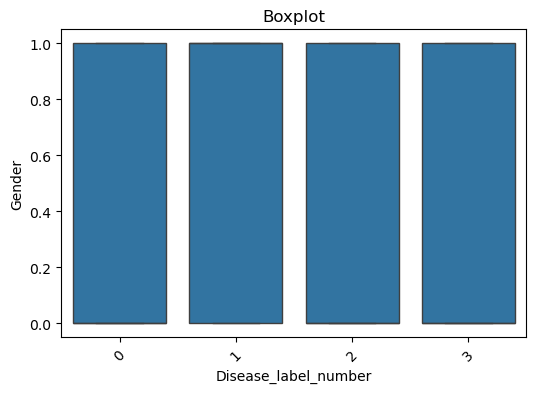

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data["Disease_label_number"].iloc[2:], y=data["Gender"].iloc[2:])

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xlabel("Disease_label_number")
plt.ylabel("Gender")
plt.title("Boxplot")
plt.show()

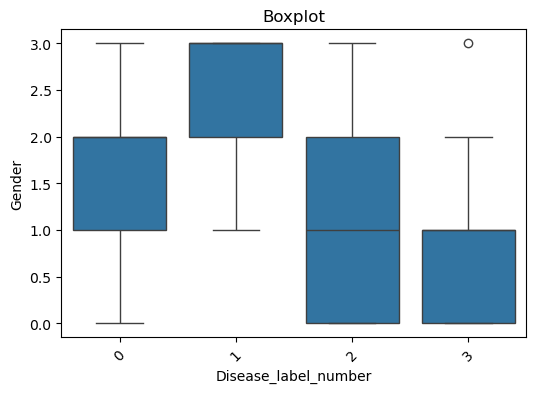

In [25]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data["Disease_label_number"].iloc[2:], y=data["Age_group"].iloc[2:])

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xlabel("Disease_label_number")
plt.ylabel("Gender")
plt.title("Boxplot")
plt.show()

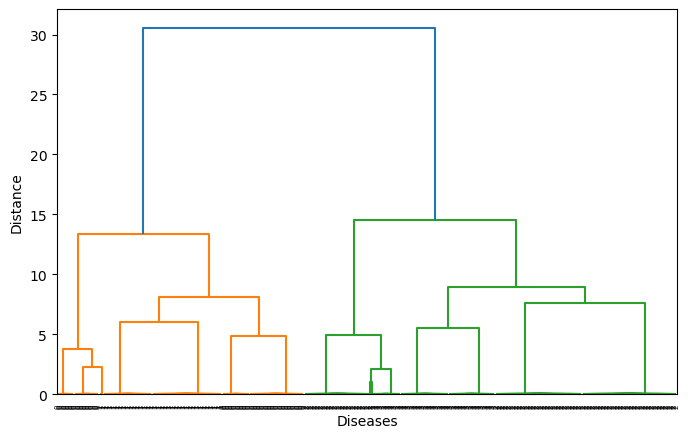

In [26]:
pairwise_distances = pdist(data.iloc[2:][['Age_group', 'Disease_label_number']], metric='euclidean')
linked = sch.linkage(pairwise_distances, method='ward', optimal_ordering=True)
labels = data['Disease_label_number'].iloc[2:].astype(str).values

plt.figure(figsize=(8, 5))
sch.dendrogram(linked, labels=labels, orientation="top")
plt.xlabel("Diseases")
plt.ylabel("Distance")
plt.show()

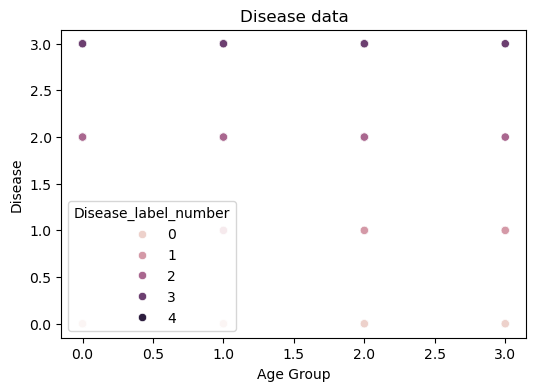

In [27]:
import matplotlib.pyplot as plt

# Scatter plot using feature1 and feature2
plt.figure(figsize=(6,4))
sns.scatterplot(data, x= data['Age_group'].iloc[2:], y=data['Disease_label_number'].iloc[2:], hue='Disease_label_number')

# Labels and Title
plt.xlabel('Age Group')
plt.ylabel('Disease')
plt.title('Disease data')
#plt.legend(title='Disease_label_number')
#plt.grid(True)

# Show the plot
plt.show()